# **** 여기부터 하기 ****

In [72]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings(action = 'ignore')

In [73]:
trn = pd.read_csv('data/train.csv', index_col = 0)
tst = pd.read_csv('data/test.csv', index_col = 0)

trn2 = trn.drop('credit', axis = 1)

df = pd.concat([trn2,tst])

In [74]:
## 나이 변환
def days_to_age(x):
    return (x*-1)/365

## 신용카드 발급월 양수로 전환
def begin_plus_month(x):
    return (x*-1)

## 신용카드 발급월 연도로 전환
def begin_plus_year(x):
    return (x)//12

## 업무 시작일 변환
def plus(x):
    if x<0:
        return x*(-1)
    else:
        return 0

# 변수 생성

## 연속형 변수 처리

In [75]:
## 나이로 변환
trn['birth'] = days_to_age(trn.DAYS_BIRTH).round()

## 나이 구간화
trn['age'] = pd.cut(trn.birth, bins = [0,10,20,30,40,50,60,70], labels = ['10','20','30','40','50','60','70'])
trn['age']

## 신용카드 발급월 변수의 변환
trn['begin_month_plus'] = begin_plus_month(trn.begin_month).round()

## 신용카드 발급월 연차로 변환
trn['begin_month_year'] = begin_plus_year(trn.begin_month_plus)

## 신용카드 발급월 구간화
trn['begin_month_bin'] = pd.cut(trn.begin_month_plus, bins = [-10,10,20,30,40,50,60,70], labels = ['10','20','30','40','50','60','70'])
trn['begin_month_bin'].value_counts()

## 업무시작일 양수로 변환
trn['employed_plus'] = trn.DAYS_EMPLOYED.map(plus)
trn['employed_plus']

## 0과 1로 범주화 (업무를 하는 사람과 아닌 사람)
trn['employed_bin'] = trn.employed_plus.map(lambda x : 0 if x==0 else 1)

## 업무 연차로 변환
trn['employed_bin2'] = trn['employed_plus']//365
trn['employed_bin2']

# trn['credit'] = trn.credit.astype('object')

index
0        12
1         4
2        12
3         5
4         5
         ..
26452     5
26453     6
26454     5
26455     0
26456     2
Name: employed_bin2, Length: 26457, dtype: int64

In [76]:
## 나이로 변환
tst['birth'] = days_to_age(tst.DAYS_BIRTH).round()

## 나이 구간화
tst['age'] = pd.cut(tst.birth, bins = [0,10,20,30,40,50,60,70], labels = ['10','20','30','40','50','60','70'])

## 신용카드 발급월 변수의 변환
tst['begin_month_plus'] = begin_plus_month(tst.begin_month).round()

## 신용카드 발급월 연차로 변환
tst['begin_month_year'] = begin_plus_year(tst.begin_month_plus)

## 신용카드 발급월 구간화
tst['begin_month_bin'] = pd.cut(tst.begin_month_plus, bins = [-10,10,20,30,40,50,60,70], labels = ['10','20','30','40','50','60','70'])

## 업무시작일 양수로 변환
tst['employed_plus'] = tst.DAYS_EMPLOYED.map(plus)

## 0과 1로 범주화 (업무를 하는 사람과 아닌 사람)
tst['employed_bin'] = tst.employed_plus.map(lambda x : 0 if x==0 else 1)

## 업무 연차로 변환
tst['employed_bin2'] = tst['employed_plus']//365


##  범주형 변수

In [77]:
## 성별 : 여성을 0으로 남성을 1로 변환
trn['gender'] = trn['gender'].map({'F': '0', 'M': '1'})

## 자동차 소유 여부 : No 0으로 yes를 1로 변환
trn['car'] = trn['car'].map({'N': '0', 'Y': '1'})

## 부동산 소유 여부 : No 0으로 yes를 1로 변환
trn['reality'] = trn['reality'].map({'N': '0', 'Y': '1'})

# trn['edu_type'] = trn.edu_type.map({'Academic degree' : '0', 
#                   "Lower secondary" : '1', 
#                   'Incomplete higher' : '2',
#                  'Secondary / secondary special':'3',
#                  'Higher education':4})

# trn['income_type'] = trn.income_type.map({'Commercial associate' : '0', 
#                   "Working" : '1', 
#                   'State servant' : '2',
#                  'Pensioner':'3',
#                  'Student':'4'})

# trn['family_type'] = trn.family_type.map({'Married' : '0', 
#                   "Civil marriage" : '1', 
#                   'Separated' : '2',
#                  'Single / not married':'3',
#                  'Widow':'4'})

# trn['house_type'] = trn.house_type.map({'Municipal apartment' : '0', 
#                   "House / apartment" : '1', 
#                   'With parents' : '2',
#                  'Co-op apartment':'3',
#                  'Rented apartment':'4',
#                   'Office apartment' : '5'  })

In [78]:
## 성별 : 여성을 0으로 남성을 1로 변환
tst['gender'] = tst['gender'].map({'F': '0', 'M': '1'})

## 자동차 소유 여부 : No 0으로 yes를 1로 변환
tst['car'] = tst['car'].map({'N': '0', 'Y': '1'})

## 부동산 소유 여부 : No 0으로 yes를 1로 변환
tst['reality'] = tst['reality'].map({'N': '0', 'Y': '1'})

# tst['edu_type'] = tst.edu_type.map({'Academic degree' : 0, 
#                   "Lower secondary" : 1, 
#                   'Incomplete higher' : 2,
#                  'Secondary / secondary special':3,
#                  'Higher education':4})

# tst['income_type'] = tst.income_type.map({'Commercial associate' : '0', 
#                   "Working" : '1', 
#                   'State servant' : '2',
#                  'Pensioner':'3',
#                  'Student':'4'})

# tst['family_type'] = tst.family_type.map({'Married' : '0', 
#                   "Civil marriage" : '1', 
#                   'Separated' : '2',
#                  'Single / not married':'3',
#                  'Widow':'4'})

# tst['house_type'] = tst.house_type.map({'Municipal apartment' : '0', 
#                   "House / apartment" : '1', 
#                   'With parents' : '2',
#                  'Co-op apartment':'3',
#                  'Rented apartment':'4',
#                   'Office apartment' : '5'  })

## NONE 범주 사용

In [79]:
## occyp_type의 결측값들을 NONE이라는 범주로 만듦
trn['occyp_type'] = trn['occyp_type'].fillna('NONE').astype(str).values
tst['occyp_type'] = tst['occyp_type'].fillna('NONE').astype(str).values

## 라벨 인코딩 (보류)

In [160]:
# 라벨 인코더 생성
encoder = LabelEncoder()

# X_train데이터를 이용 피팅하고 라벨숫자로 변환
encoder.fit(trn['occyp_type'])
trn['occyp_type'] = encoder.transform(trn['occyp_type'])
trn['occyp_type'].astype('object')

tst['occyp_type'] = encoder.transform(tst['occyp_type'])
tst['occyp_type'].astype('object')

index
26457    12
26458     3
26459     8
26460     4
26461    10
         ..
36452     0
36453     8
36454    11
36455    12
36456     8
Name: occyp_type, Length: 10000, dtype: object

In [147]:
# # X_test데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가한다 (중요!!!)
# for label in np.unique(tst['occyp_type']):
#     if label not in encoder.classes_: # unseen label 데이터인 경우( )
#         encoder.classes_ = np.append(encoder.classes_, label) # 미처리 시 ValueError발생
# X_test_encoded = encoder.transform(tst['occyp_type'])
# X_test_encoded

In [35]:
trn.head(2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,begin_month,credit,birth,age,begin_month_plus,begin_month_year,begin_month_bin,employed_plus,employed_bin,employed_bin2
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,...,-6.0,1.0,38.0,40,6.0,0.0,10,4709,1,12
1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,...,-5.0,1.0,31.0,40,5.0,0.0,10,1540,1,4


## 원핫인코딩

In [80]:
trn_one_hot = pd.get_dummies(trn.drop(['credit'],axis=1), drop_first=True)
trn_one_hot

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,...,age_40,age_50,age_60,age_70,begin_month_bin_20,begin_month_bin_30,begin_month_bin_40,begin_month_bin_50,begin_month_bin_60,begin_month_bin_70
index,,,,,,,,,,,,,,,,,,,,,
0,0,202500.0,-13899,-4709,1,0,0,0,2.0,-6.0,...,1,0,0,0,0,0,0,0,0,0
1,1,247500.0,-11380,-1540,1,0,0,1,3.0,-5.0,...,1,0,0,0,0,0,0,0,0,0
2,0,450000.0,-19087,-4434,1,0,1,0,2.0,-22.0,...,0,0,1,0,0,1,0,0,0,0
3,0,202500.0,-15088,-2092,1,0,1,0,2.0,-37.0,...,0,1,0,0,0,0,1,0,0,0
4,0,157500.0,-15037,-2105,1,0,0,0,2.0,-26.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,2,225000.0,-12079,-1984,1,0,0,0,4.0,-2.0,...,1,0,0,0,0,0,0,0,0,0
26453,1,180000.0,-15291,-2475,1,0,0,0,2.0,-47.0,...,0,1,0,0,0,0,0,1,0,0
26454,0,292500.0,-10082,-2015,1,0,0,0,2.0,-25.0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
tst_one_hot = pd.get_dummies(tst, drop_first=True)
tst_one_hot

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,...,age_40,age_50,age_60,age_70,begin_month_bin_20,begin_month_bin_30,begin_month_bin_40,begin_month_bin_50,begin_month_bin_60,begin_month_bin_70
index,,,,,,,,,,,,,,,,,,,,,
26457,0,112500.0,-21990,365243,1,0,1,0,2.0,-60.0,...,0,0,1,0,0,0,0,0,1,0
26458,0,135000.0,-18964,-8671,1,0,1,0,2.0,-36.0,...,0,0,1,0,0,0,1,0,0,0
26459,0,69372.0,-15887,-217,1,1,1,0,2.0,-40.0,...,0,1,0,0,0,0,1,0,0,0
26460,0,112500.0,-19270,-2531,1,1,0,0,2.0,-41.0,...,0,0,1,0,0,0,0,1,0,0
26461,0,225000.0,-17822,-9385,1,1,0,0,2.0,-8.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0,202500.0,-18593,-5434,1,1,1,0,2.0,-19.0,...,0,0,1,0,1,0,0,0,0,0
36453,0,202500.0,-10886,-1315,1,1,0,0,2.0,-34.0,...,0,0,0,0,0,0,1,0,0,0
36454,0,292500.0,-21016,-14018,1,0,0,0,2.0,-55.0,...,0,0,1,0,0,0,0,0,1,0


In [82]:
## 결측치 없음
trn.isnull().sum()
tst.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type          0
family_size         0
begin_month         0
birth               0
age                 0
begin_month_plus    0
begin_month_year    0
begin_month_bin     0
employed_plus       0
employed_bin        0
employed_bin2       0
dtype: int64

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    trn_one_hot, 
    trn.credit, 
    test_size = 0.2,
    stratify = trn['credit'],
    random_state=40)

In [121]:
X_train.shape

(21165, 66)

In [122]:
## 모델링
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=2000,
                            n_jobs = 10,
                            random_state = 40,
                            verbose = True)
clf = clf.fit(X_train, y_train)

# predict
RF_pred = clf.predict_proba(X_test)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.8s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.8s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    3.3s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    5.3s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    7.7s
[Parallel(n_jobs=10)]: Done 2000 out of 2000 | elapsed:    8.7s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    0.4s
[Parallel(n_job

In [140]:
# predict
RF_pred = clf.predict_proba(X_test)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 2000 out of 2000 | elapsed:    0.4s finished


## 원핫인코딩

In [156]:
trn_one_hot = pd.get_dummies(trn.drop(['credit'],axis=1), drop_first=True)
trn_one_hot

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,...,age_40,age_50,age_60,age_70,begin_month_bin_20,begin_month_bin_30,begin_month_bin_40,begin_month_bin_50,begin_month_bin_60,begin_month_bin_70
index,,,,,,,,,,,,,,,,,,,,,
0,0,202500.0,-13899,-4709,1,0,0,0,2.0,-6.0,...,1,0,0,0,0,0,0,0,0,0
1,1,247500.0,-11380,-1540,1,0,0,1,3.0,-5.0,...,1,0,0,0,0,0,0,0,0,0
2,0,450000.0,-19087,-4434,1,0,1,0,2.0,-22.0,...,0,0,1,0,0,1,0,0,0,0
3,0,202500.0,-15088,-2092,1,0,1,0,2.0,-37.0,...,0,1,0,0,0,0,1,0,0,0
4,0,157500.0,-15037,-2105,1,0,0,0,2.0,-26.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,2,225000.0,-12079,-1984,1,0,0,0,4.0,-2.0,...,1,0,0,0,0,0,0,0,0,0
26453,1,180000.0,-15291,-2475,1,0,0,0,2.0,-47.0,...,0,1,0,0,0,0,0,1,0,0
26454,0,292500.0,-10082,-2015,1,0,0,0,2.0,-25.0,...,0,0,0,0,0,1,0,0,0,0


In [157]:
tst_one_hot = pd.get_dummies(tst, drop_first=True)
tst_one_hot

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,...,age_40,age_50,age_60,age_70,begin_month_bin_20,begin_month_bin_30,begin_month_bin_40,begin_month_bin_50,begin_month_bin_60,begin_month_bin_70
index,,,,,,,,,,,,,,,,,,,,,
26457,0,112500.0,-21990,365243,1,0,1,0,2.0,-60.0,...,0,0,1,0,0,0,0,0,1,0
26458,0,135000.0,-18964,-8671,1,0,1,0,2.0,-36.0,...,0,0,1,0,0,0,1,0,0,0
26459,0,69372.0,-15887,-217,1,1,1,0,2.0,-40.0,...,0,1,0,0,0,0,1,0,0,0
26460,0,112500.0,-19270,-2531,1,1,0,0,2.0,-41.0,...,0,0,1,0,0,0,0,1,0,0
26461,0,225000.0,-17822,-9385,1,1,0,0,2.0,-8.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0,202500.0,-18593,-5434,1,1,1,0,2.0,-19.0,...,0,0,1,0,1,0,0,0,0,0
36453,0,202500.0,-10886,-1315,1,1,0,0,2.0,-34.0,...,0,0,0,0,0,0,1,0,0,0
36454,0,292500.0,-21016,-14018,1,0,0,0,2.0,-55.0,...,0,0,1,0,0,0,0,0,1,0


# 로그로스 함수

In [153]:
log_loss(y_test, RF_pred)

0.7623861475096417

In [163]:
ftr = trn_one_hot.values
target = trn['credit'].values
tst_ar = tst.values
n_class = 3
n_fold = 5

In [164]:
tst_ar.shape

(10000, 26)

In [169]:
## predict_rf
ftr = trn_one_hot.values
target = trn['credit'].values
tst_ar = tst_one_hot.values
n_class = 3
n_fold = 5

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)

rf_p_val = np.zeros((ftr.shape[0], n_class))
rf_p_tst = np.zeros((tst_ar.shape[0], n_class))
for i, (i_trn, i_val) in enumerate(cv.split(ftr, target), 1):
    print(f'training model for CV #{i}')
    rf_clf = RandomForestClassifier(n_estimators = 1000, 
                                random_state=40,
                                verbose=True,
                                oob_score=True,
                                n_jobs=10)
    rf_clf.fit(ftr[i_trn], target[i_trn])
    rf_p_val[i_val, :] = rf_clf.predict_proba(ftr[i_val])
    rf_p_tst += rf_clf.predict_proba(tst_ar) / n_fold
    
print(f'{log_loss(target, rf_p_val)}')
print(f'{confusion_matrix(target, np.argmax(rf_p_val, axis=1))}%')

(26457, 27)
training model for CV #1


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.3s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    4.2s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:    5.5s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elaps

training model for CV #2


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.3s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    4.3s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:    5.5s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elaps

training model for CV #3


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    4.5s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:    5.7s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elaps

training model for CV #4


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.3s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    4.3s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:    5.5s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elaps

training model for CV #5


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    4.4s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:    5.7s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elaps

0.7649898099884115
[[  533   484  2205]
 [  196  2391  3680]
 [  427  1006 15535]]%


# 제출하기

In [175]:
sub = pd.read_csv('data/sample_submission.csv', index_col = 0)
sub
sub[sub.columns] = rf_p_tst

In [177]:
sub.to_csv('data/210428_rf_처음.csv')

<BarContainer object of 66 artists>

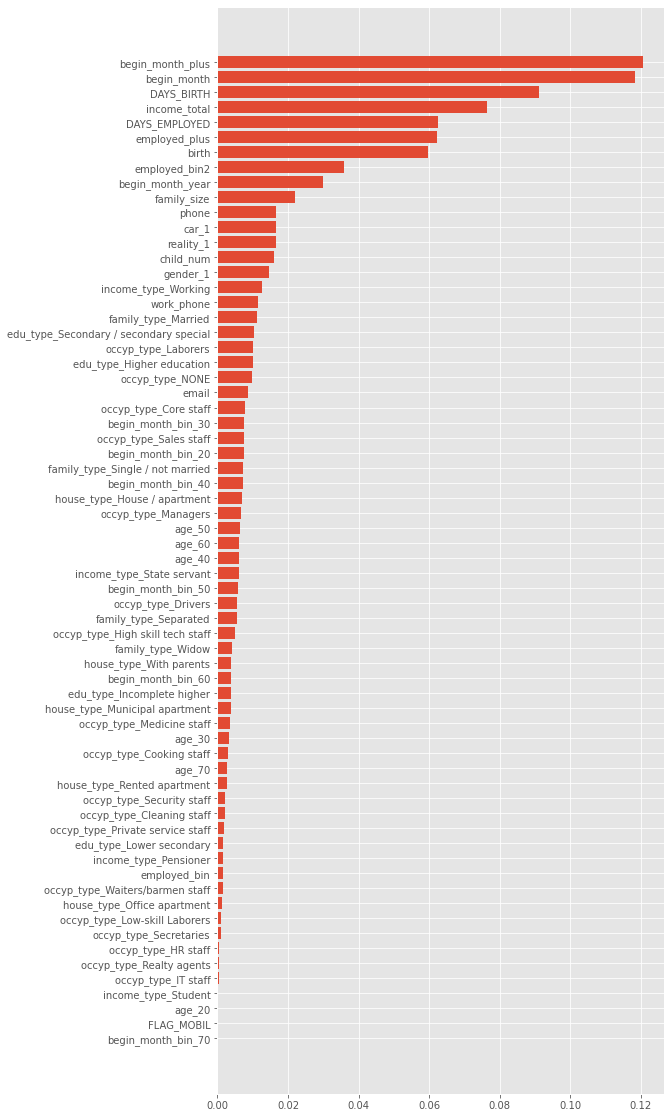

In [184]:
importances_id = rf_clf.feature_importances_.argsort()
plt.figure(figsize = (8,20))
plt.barh(trn_one_hot.columns[importances_id], rf_clf.feature_importances_[importances_id])

In [185]:
trn_one_hot.corr()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,...,age_40,age_50,age_60,age_70,begin_month_bin_20,begin_month_bin_30,begin_month_bin_40,begin_month_bin_50,begin_month_bin_60,begin_month_bin_70
child_num,1.000000,0.032186,0.332816,-0.228159,NaN,0.051521,-0.010555,0.016120,0.890530,-0.007229,...,0.333316,-0.013184,-0.261382,-0.174879,-0.010211,0.022945,0.008030,-0.004654,-0.003625,NaN
income_total,0.032186,1.000000,0.064155,-0.166478,NaN,-0.034207,0.019013,0.089882,0.023839,-0.018047,...,0.041938,0.086115,-0.045739,-0.100441,0.014579,0.019961,0.001779,0.000473,0.000902,NaN
DAYS_BIRTH,0.332816,0.064155,1.000000,-0.616776,NaN,0.178752,-0.029247,0.111238,0.298108,0.057306,...,0.442444,-0.074918,-0.535693,-0.551529,0.001342,0.027335,-0.008668,-0.022989,-0.049846,NaN
DAYS_EMPLOYED,-0.228159,-0.166478,-0.616776,1.000000,NaN,-0.241827,-0.007749,-0.091090,-0.223077,0.007964,...,-0.276507,-0.230705,0.298902,0.571738,0.005879,-0.020687,-0.003412,-0.000391,0.004201,NaN
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
begin_month_bin_30,0.022945,0.019961,0.027335,-0.020687,NaN,0.011208,0.008955,0.003154,0.022795,0.019826,...,0.023653,-0.011399,-0.015923,-0.014195,-0.239932,1.000000,-0.203056,-0.182805,-0.156297,NaN
begin_month_bin_40,0.008030,0.001779,-0.008668,-0.003412,NaN,0.011890,0.012765,-0.011448,0.015436,-0.247707,...,0.009265,0.001858,0.003307,0.001250,-0.221902,-0.203056,1.000000,-0.169069,-0.144552,NaN
begin_month_bin_50,-0.004654,0.000473,-0.022989,-0.000391,NaN,-0.003068,-0.010633,0.009293,0.003533,-0.451938,...,0.012366,0.011520,0.003649,0.006649,-0.199773,-0.182805,-0.169069,1.000000,-0.130136,NaN
begin_month_bin_60,-0.003625,0.000902,-0.049846,0.004201,NaN,-0.004326,0.009541,-0.007346,0.001449,-0.585250,...,-0.011467,0.037832,0.014688,0.012146,-0.170804,-0.156297,-0.144552,-0.130136,1.000000,NaN


In [187]:
index_col = 'index'
target_col = 'credit'

cat_cols = [x for x in trn.columns if trn[x].dtype == 'object']
num_cols = [x for x in trn.columns if x not in cat_cols + [target_col]]
feature_cols = num_cols + cat_cols
print(len(feature_cols), len(cat_cols), len(num_cols))

26 8 18


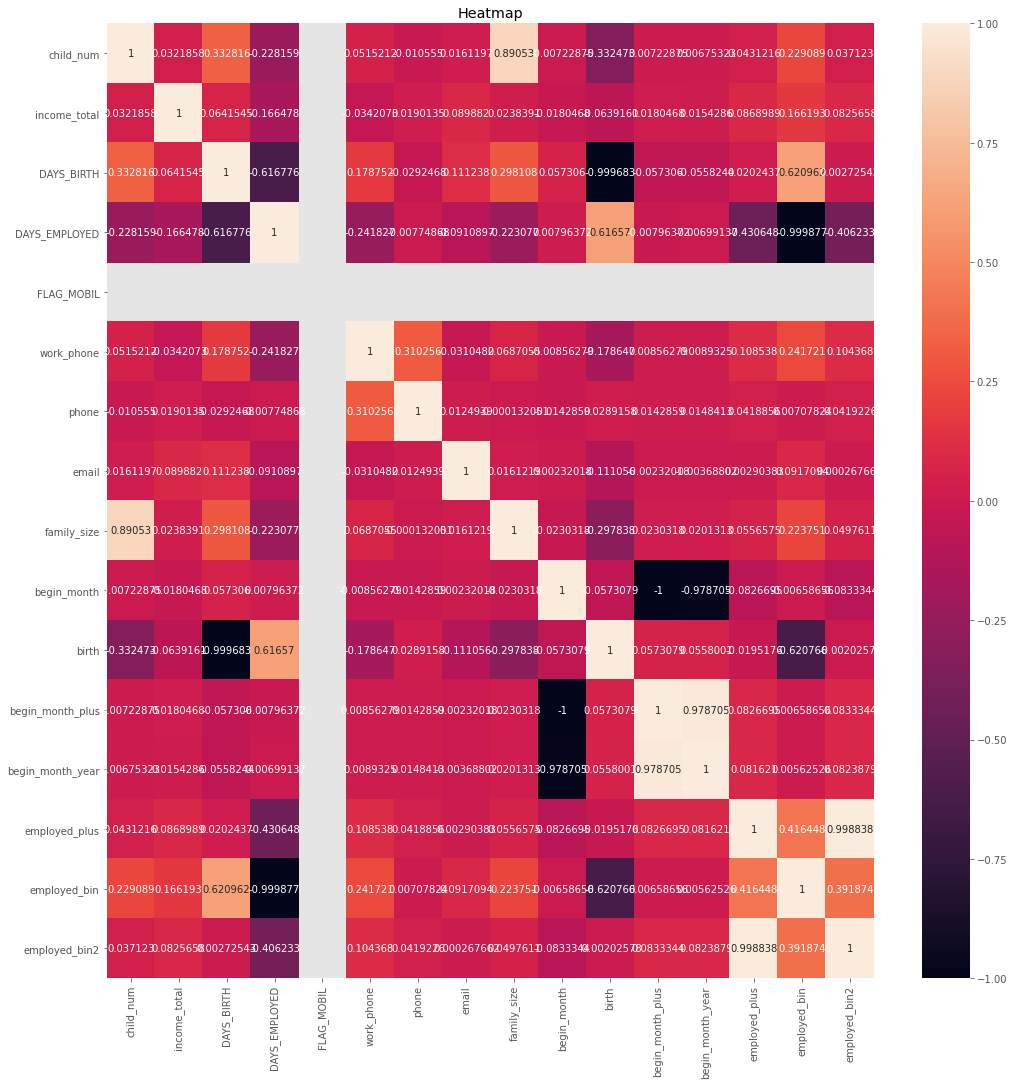

In [191]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(trn[num_cols].corr(), annot=True, fmt='g')
plt.tight_layout()
plt.title("Heatmap")
plt.show()